In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
cancer = load_breast_cancer()

In [ ]:
feature_data = cancer.data
label_data = cancer.target
print(cancer.target_names)
print(cancer.DESCR)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_data, label_data, test_size = 32)
print("data len: {}\ntrain len: {}".format(len(feature_data), len(x_train)))

data len: 569
train len: 537


In [ ]:
models = []
#Decision Tree 
decision_tree = DecisionTreeClassifier(random_state=32)
models.append(decision_tree)
decision_tree.fit(x_train, y_train)
#Random Forest
random_forest = RandomForestClassifier(random_state=32)
models.append(random_forest)
random_forest.fit(x_train, y_train)
#SVM
svm_model = svm.SVC()
models.append(svm_model)
svm_model.fit(x_train, y_train)
#SGD Classifier
sgd_model = SGDClassifier()
models.append(sgd_model)
sgd_model.fit(x_train, y_train)
#Logistic Regression
logistic_model = LogisticRegression(solver='lbfgs', max_iter=5000)
models.append(logistic_model)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_pred = []
for i in models:
    y_pred.append(i.predict(x_test))

In [ ]:
accuracy = [['Decision Tree'], ['Random Forest'], ['SVM'], ['SGDClassifier'], ['Logistic Regression']]
weighted_avg = [['Decision Tree'], ['Random Forest'], ['SVM'], ['SGDClassifier'], ['Logistic Regression']]
for i, y_pred in enumerate(y_pred):
    temp_class_report = classification_report(y_test, y_pred, output_dict=True)
    accuracy[i].append(temp_class_report['accuracy'])
    weighted_avg[i].append(temp_class_report['weighted avg']['f1-score'])

In [ ]:
print("f1 socre \n:", weighted_avg)
model_name, acc = max(weighted_avg, key=lambda k : k[1])
print("model = {}, weigted_avg = {}".format(model_name, acc))
model_num = [i for i in range(len(weighted_avg)) if weighted_avg[i][0]==model_name]

In [ ]:
model = LogisticRegression(C=1)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(-1.0, 1.0)

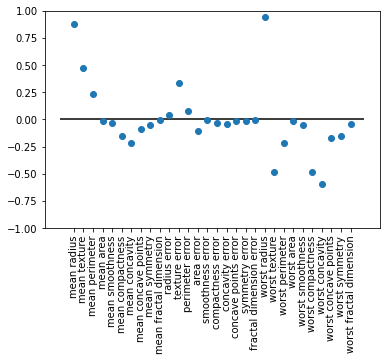

In [ ]:
plt.plot(model.coef_.T, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlim = plt.xlim()
plt.hlines(0, xlim[0], xlim[1])
plt.ylim(-1, 1)
#카테고리별 선형모델